# Imports


In [64]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [65]:

amplitude = 10000
sim_width = 4500e-6
pixel_size = 1e-6 
n_slices = 100

lens_2 = Lens.Lens(
    diameter=sim_width,
    height=3,
    exponent=1.0,
    medium=Lens.Medium(2.348)
)

lens = Lens.Lens(diameter=5, height=3, exponent=2.0, medium=Lens.Medium(2.348))

In [ ]:
z_step = 0.2
# z_step = 0.1
rounding = 0
medium = Lens.Medium(1.5)
lens.generate_profile(pixel_size=pixel_size)
# plt.plot(lens.profile)
# plt.show()

phase_diff_profile = Simulation.generate_differential_refractive_index_profile(
    lens=lens, z_resolution=z_step, previous_slice=len(lens.profile) * [1.33], output_medium=medium, pixel_size=pixel_size
)

size = 4

plt.figure(figsize=(size, size))
plt.imshow(phase_diff_profile, aspect="auto", interpolation="none", cmap="Blues")
plt.colorbar()
plt.show()

MemoryError: Unable to allocate 11.2 GiB for an array with shape (301, 5000001) and data type float64

c:\Users\David  Dierickx\.conda\envs\lens_simulation\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


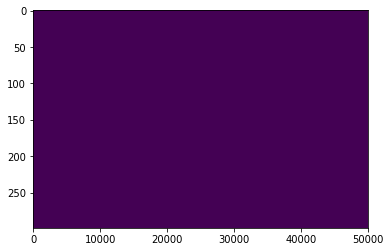

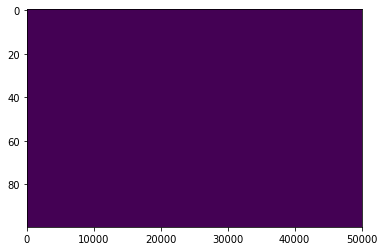

In [ ]:

freq_array = Simulation.generate_squared_frequency_array(n_pixels=len(lens.profile), pixel_size=pixel_size)

wavefronts = np.zeros(shape=phase_diff_profile.shape)
outputs = np.zeros(shape=phase_diff_profile.shape)


for i, slice in enumerate(phase_diff_profile):
    delta = slice * z_step
    phase = (2 * np.pi * delta / medium.wavelength_medium ) % (2 * np.pi)

    if i is 1:
        wavefront = 10000 * np.exp(1j*phase)
    else:
        current_wavefront = 1 * np.exp(1j * phase)
        wavefront = current_wavefront * wavefronts[i-1]

    propagator = np.exp(1j * medium.wave_number * z_step * (i+1))  * np.exp( (-1j * 2 * np.pi ** 2 * (z_step * (i+1)) * freq_array) / medium.wave_number)
    propagation = fftpack.ifft(propagator * wavefront)

    output = np.sqrt(propagation.real**2 + propagation.imag**2)
    wavefronts[i] = propagation
    outputs[i] = output

plt.imshow(outputs, aspect='auto')
plt.show()

sim = np.ones(shape=(n_slices, len(lens.profile)))

equivalent_focal_distance = Simulation.calculate_equivalent_focal_distance(lens, medium)
start_distance = 0.8 * equivalent_focal_distance  # 25e-3
finish_distance = 1.2 * equivalent_focal_distance  # 28e-3

distances = np.linspace(start_distance, finish_distance, n_slices)
for i, z in enumerate(distances):
    wavefront = fftpack.fft(wavefronts[-1])
    prop = np.exp(1j * medium.wave_number * z)  * np.exp( (-1j * 2 * np.pi ** 2 * z * freq_array) / medium.wave_number)
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop * wavefront)

    output = np.sqrt(propagation.real**2 + propagation.imag**2)

    sim[i] = output
    # print(f'Slice: {i} complete')

plt.imshow(sim, aspect='auto')
plt.show()
